In [324]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Preprocessing and Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score
)



In [325]:
label_df = pd.read_csv("./data_csv/failed_bank-data_2008_2010.csv")
label_df["LABEL"] = 1
label_df = label_df[["CERT","LABEL"]]
label_df = label_df.rename(columns={"CERT" : "cert", "LABEL" : "label"})

In [329]:
label_df = pd.read_csv("./data_csv/failed_bank-data_2008_2010.csv")

In [331]:
"Reload the CSV file after code execution state reset"
financial_files_path = "./data_csv/Financial_*.csv"
all_files = glob.glob(financial_files_path)

In [332]:
df_list = []
for file in all_files:
    temp_df = pd.read_csv(file)
    quarter = file.split("_")[2] + "_" + file.split("_")[3].split(".")[0]
    temp_df["QUARTER"] = quarter
    df_list.append(temp_df)

In [333]:
merged_df = pd.concat(df_list)

In [ ]:
merged_df = merged_df[merged_df['IDT1RWAJR'] < 100] # added after first round

In [ ]:
merged_df["EXTRA"].describe()

ZIP      IDT1RWAJR         EXTRA          TFRA  \
count  122148.000000  122148.000000  1.218770e+05  1.221480e+05   
mean    52557.558863      16.614870  3.202341e+01  1.952207e+06   
std     23489.123251      10.077985  5.733672e+03  6.280274e+07   
min         0.000000     -18.955043 -3.740000e+05  0.000000e+00   
25%     35474.000000      10.959607  0.000000e+00  0.000000e+00   
50%     55931.000000      13.660306  0.000000e+00  0.000000e+00   
75%     68959.000000      18.569188  0.000000e+00  0.000000e+00   
max     99901.000000      99.962700  1.520000e+06  5.589705e+09   

            IDNCCONR    EQCDIVNTINC       INSDATE        BKPREM       SZLNCON  \
count  122148.000000  122148.000000  1.221480e+05  1.218770e+05  1.105180e+05   
mean        0.773173      45.863737  2.047414e+07  1.226974e+04  2.302568e+03   
std         2.267039     485.686234  8.309366e+06  1.515171e+05  1.035951e+05   
min         0.000000       0.000000  1.933120e+07  0.000000e+00  0.000000e+00   
25%         0.000000       0.000000  1.934010e+07  6.530000e+02  0.000000e+00   
50%         0.212202      16.928961  1.953012e+07  1.988000e+03  0.000000e+00   
75%         0.820638      59.113670  1.989081e+07  5.130000e+03  0.000000e+00   
max       100.000000   81200.000000  9.999123e+07  1.115449e+07  1.258000e+07   

              INTAN  ...        RBCRWAJ        SZLNCI      LSASCDBT  \
count  1.218770e+05  ...  122148.000000  1.105180e+05  1.545900e+04   
mean   3.881722e+04  ...      21.251737  1.243354e+03  3.062255e+02   
std    8.230867e+05  ...     102.664350  5.409123e+04  1.783458e+04   
min    0.000000e+00  ...     -18.955043  0.000000e+00  0.000000e+00   
25%    0.000000e+00  ...      12.187411  0.000000e+00  0.000000e+00   
50%    0.000000e+00  ...      14.914276  0.000000e+00  0.000000e+00   
75%    4.320000e+02  ...      19.971723  0.000000e+00  0.000000e+00   
max    7.375789e+07  ...   26200.000000  4.239000e+06  1.539477e+06   

            IDNCGTPR       IDERNCVR          NFAA        ESTYMD         NONII  \
count  122148.000000  122148.000000  1.221480e+05  1.221480e+05  1.218770e+05   
mean        3.529585      70.710920  2.232068e+03  1.937820e+07  1.729002e+04   
std        13.698760    1046.883983  1.329410e+05  4.324742e+05  3.584029e+05   
min         0.000000  -19563.277778  0.000000e+00  1.784010e+07 -2.736860e+05   
25%         0.000000       0.000000  0.000000e+00  1.904010e+07  1.410000e+02   
50%         0.000000       5.750000  0.000000e+00  1.928052e+07  4.180000e+02   
75%         0.000000      28.294118  0.000000e+00  1.983013e+07  1.289000e+03   
max       170.277481  169194.500000  1.627542e+07  2.010121e+07  3.573400e+07   

               TRUST         EQTOT  
count  122148.000000  1.218770e+05  
mean        0.283500  1.289257e+05  
std         0.450699  1.983144e+06  
min         0.000000 -1.311200e+04  
25%         0.000000  6.328000e+03  
50%         0.000000  1.250500e+04  
75%         1.000000  2.815400e+04  
max         1.000000  1.798135e+08  

[8 rows x 139 columns]

In [348]:
merged_df["TFRA"].describe()

count    1.221480e+05
mean     1.952207e+06
std      6.280274e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.589705e+09
Name: TFRA, dtype: float64

In [237]:
# Define useful features for CAMELS-based feature engineering

camel_core_features = [
    # Capital Adequacy
    'EQV', 'EQTOT', 'IDT1RWAJR', 'RBCRWAJ',

    # Asset Quality
    'LNATRESR', 'NTLNLSR', 'NCLNLSR', 'LNLSDEPR', 'LNLSNET',
    'ORE', 'P3ASSET', 'NCRER', 'NCRERESR', 'NTRECOSR','EQCDIVNTINC',

    # Management
    'EINTEXP', 'INTINC', 'NUMEMP',

    # Earnings
    'ROA', 'ROAPTX', 'ROE', 'PTAXNETINC', 'NETINC',
    'NOIJ', 'NONII', 'NIM',

    # Liquidity
    'DEP', 'COREDEP', 'DEPINS', 'DEPUNINS', 'DEPNIDOM',

    # Sensitivity to Market Risk
    'IGLSEC', 'ASDRRES',

    # Total Assets
    'NAASSET'
]

# Optional metadata for grouping, merging, filtering
metadata_fields = [
    'CERT', 'NAMEFULL', 'ZIP', 'STNAME', 'CITY',
    'RSSDID', 'BKCLASS', 'MUTUAL', 'TRUST', 'QUARTER'
]

# Labeling or time metadata
labeling_fields = [
    'INSDATE', 'ESTYMD'
]

# Final full set to keep
columns_to_keep = camel_core_features + metadata_fields + labeling_fields

In [238]:
selected_merged_df = merged_df[columns_to_keep]

In [239]:
selected_merged_df.describe()

EQV         EQTOT      IDT1RWAJR        RBCRWAJ  \
count  123572.000000  1.233010e+05  123572.000000  123572.000000   
mean       12.456808  1.306563e+05      20.799747      25.391862   
std        11.049177  1.991125e+06     118.616902     156.091798   
min       -16.065911 -1.311200e+04     -18.955043     -18.955043   
25%         8.411170  6.322000e+03      10.987732      12.212456   
50%         9.888535  1.249400e+04      13.736420      14.995298   
75%        12.431444  2.808400e+04      18.857978      20.266446   
max       100.049505  1.798135e+08   22798.245614   26200.000000   

            LNATRESR        NTLNLSR        NCLNLSR      LNLSDEPR  \
count  123572.000000  123572.000000  123572.000000  1.235720e+05   
mean        1.401141       0.254550       1.143081  1.010582e+03   
std         1.341104       2.151341       2.412998  9.008876e+04   
min         0.000000    -440.568696       0.000000 -1.230315e+01   
25%         0.964798       0.000000       0.117672  6.440095e+01   
50%         1.224777       0.047241       0.508511  7.996354e+01   
75%         1.571552       0.223267       1.302603  9.289045e+01   
max       100.000000      98.372377     100.000000  2.119370e+07   

            LNLSNET           ORE  ...        IGLSEC       ASDRRES  \
count  1.235720e+05  1.233010e+05  ...  1.233010e+05  1.115980e+05   
mean   7.379641e+05  1.430146e+03  ...  4.471938e+02  6.655085e+03   
std    1.050111e+07  3.322018e+04  ...  2.100930e+04  2.701424e+05   
min   -1.250000e+02 -1.939900e+04  ... -1.463000e+06  0.000000e+00   
25%    3.219150e+04  0.000000e+00  ...  0.000000e+00  0.000000e+00   
50%    7.546400e+04  0.000000e+00  ...  0.000000e+00  0.000000e+00   
75%    1.847878e+05  2.710000e+02  ...  3.000000e+00  0.000000e+00   
max    7.137270e+08  5.794000e+06  ...  2.975000e+06  2.698500e+07   

            NAASSET           CERT            ZIP        RSSDID  \
count  1.235720e+05  123572.000000  123572.000000  1.235720e+05   
mean   7.083879e+03   21393.905537   52543.624478  9.800662e+05   
std    2.081819e+05   16032.855228   23554.147204  9.672343e+05   
min    0.000000e+00       9.000000       0.000000  3.700000e+01   
25%    9.000000e+00    9433.000000   35210.000000  3.283570e+05   
50%    2.510000e+02   17880.000000   55917.000000  6.571780e+05   
75%    1.088000e+03   30337.000000   69001.000000  9.796290e+05   
max    3.013552e+07   91385.000000   99901.000000  4.210227e+06   

              MUTUAL          TRUST       INSDATE        ESTYMD  
count  123572.000000  123572.000000  1.235720e+05  1.235720e+05  
mean        0.066868       0.283721  2.046787e+07  1.938401e+07  
std         0.249794       0.450805  8.261582e+06  4.346905e+05  
min         0.000000       0.000000  1.933120e+07  1.784010e+07  
25%         0.000000       0.000000  1.934010e+07  1.904020e+07  
50%         0.000000       0.000000  1.954050e+07  1.929051e+07  
75%         0.000000       1.000000  1.989081e+07  1.984010e+07  
max         1.000000       1.000000  9.999123e+07  2.010122e+07  

[8 rows x 41 columns]

In [240]:
selected_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123572 entries, 0 to 7747
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   EQV          123572 non-null  float64
 1   EQTOT        123301 non-null  float64
 2   IDT1RWAJR    123572 non-null  float64
 3   RBCRWAJ      123572 non-null  float64
 4   LNATRESR     123572 non-null  float64
 5   NTLNLSR      123572 non-null  float64
 6   NCLNLSR      123572 non-null  float64
 7   LNLSDEPR     123572 non-null  float64
 8   LNLSNET      123572 non-null  int64  
 9   ORE          123301 non-null  float64
 10  P3ASSET      123572 non-null  int64  
 11  NCRER        123572 non-null  float64
 12  NCRERESR     123572 non-null  float64
 13  NTRECOSR     123572 non-null  float64
 14  EQCDIVNTINC  123572 non-null  float64
 15  EINTEXP      123301 non-null  float64
 16  INTINC       123301 non-null  float64
 17  NUMEMP       123301 non-null  float64
 18  ROA          123572 non-null  f

In [241]:
# non_null_counts = selected_merged_df.notnull().sum()

In [242]:
# selected_merged_df = selected_merged_df.dropna()

In [243]:
# Set the visual style
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Plot distributions
def plot_feature_distributions(df, features, bins=100):
    n_cols = 4
    n_rows = (len(features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if feature in df.columns:
            sns.histplot(df[feature].dropna(), kde=True, bins=bins, ax=axes[i])
            axes[i].set_title(feature)
        else:
            axes[i].axis("off")

    # # Turn off any unused subplots
    # for j in range(i + 1, len(axes)):
    #     axes[j].axis("off")

    plt.tight_layout()
    plt.show()



In [244]:
# # Run the plot function
# plot_feature_distributions(selected_merged_df, camel_core_features)

In [245]:
camels_ratios_df = pd.DataFrame({
    "cert": selected_merged_df["CERT"],
    "bank_name": selected_merged_df["NAMEFULL"],
    "quarter": selected_merged_df["QUARTER"],

    # Capital Adequacy (C)
    "equity_to_assets": selected_merged_df["EQV"] / selected_merged_df["NAASSET"],
    "tier1_rwa_ratio": selected_merged_df["IDT1RWAJR"],
    "total_equity_ratio": selected_merged_df["EQTOT"] / selected_merged_df["NAASSET"],
    "dividends_to_equity": selected_merged_df["EQCDIVNTINC"] / selected_merged_df["EQV"],

    # Asset Quality (A)
    "loan_loss_reserve_to_loans": selected_merged_df["LNATRESR"] / selected_merged_df["NTLNLSR"],
    "noncurrent_loans_to_loans": selected_merged_df["NCLNLSR"] / selected_merged_df["NTLNLSR"],
    "ore_to_assets": selected_merged_df["ORE"] / selected_merged_df["NAASSET"],
    "assets_past_due_30_89_to_assets": selected_merged_df["P3ASSET"] / selected_merged_df["NAASSET"],
    "noncurrent_real_estate_to_assets": selected_merged_df["NCRER"] / selected_merged_df["NAASSET"],
    "noncurrent_re_to_loans": selected_merged_df["NCRERESR"] / selected_merged_df["NTLNLSR"],

    # Management (M)
    "efficiency_ratio_proxy": selected_merged_df["EINTEXP"] / selected_merged_df["INTINC"],
    "noninterest_income_to_assets": selected_merged_df["NONII"] / selected_merged_df["NAASSET"],
    "operating_income_to_assets": selected_merged_df["NOIJ"] / selected_merged_df["NAASSET"],
    "assets_per_employee": selected_merged_df["NAASSET"] / selected_merged_df["NUMEMP"],

    # Earnings (E)
    "return_on_assets": selected_merged_df["ROA"],
    "pretax_return_on_assets": selected_merged_df["ROAPTX"],
    "return_on_equity": selected_merged_df["ROE"],
    "net_income_to_assets": selected_merged_df["NETINC"] / selected_merged_df["NAASSET"],
    "pretax_income_to_assets": selected_merged_df["PTAXNETINC"] / selected_merged_df["NAASSET"],

    # Liquidity (L)
    "net_loans_to_total_deposits": selected_merged_df["LNLSNET"] / selected_merged_df["DEP"],
    "uninsured_deposits_to_total_deposits": selected_merged_df["DEPUNINS"] / selected_merged_df["DEP"],
    "insured_deposits_to_total_deposits": selected_merged_df["DEPINS"] / selected_merged_df["DEP"],

    # Sensitivity (S) — intentionally excluded due to poor data
    # "securities_to_assets" and "asset_sensitivity_proxy" excluded
})

In [246]:
# # Run the plot function
# plot_feature_distributions(camels_ratios_df, camels_ratios_df.columns[3:])

In [247]:
camels_ratios_df = camels_ratios_df.replace([np.inf, -np.inf], np.nan)

In [248]:
print(camels_ratios_df.describe())

                cert  equity_to_assets  tier1_rwa_ratio  total_equity_ratio  \
count  123572.000000      95768.000000    123572.000000        95649.000000   
mean    21393.905537          0.212554        20.799747          252.692049   
std     16032.855228          1.090607       118.616902         2715.871969   
min         9.000000         -0.004659       -18.955043           -2.219512   
25%      9433.000000          0.006025        10.987732           12.639594   
50%     17880.000000          0.020382        13.736420           30.717391   
75%     30337.000000          0.074515        18.857978           88.627119   
max     91385.000000         52.550177     22798.245614       415196.000000   

       dividends_to_equity  loan_loss_reserve_to_loans  \
count        123301.000000               104490.000000   
mean              4.532690                    8.660421   
std              38.736809                  224.080304   
min               0.000000               -12703.362999  

In [249]:
camels_ratios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123572 entries, 0 to 7747
Data columns (total 25 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   cert                                  123572 non-null  int64  
 1   bank_name                             123572 non-null  object 
 2   quarter                               123572 non-null  object 
 3   equity_to_assets                      95768 non-null   float64
 4   tier1_rwa_ratio                       123572 non-null  float64
 5   total_equity_ratio                    95649 non-null   float64
 6   dividends_to_equity                   123301 non-null  float64
 7   loan_loss_reserve_to_loans            104490 non-null  float64
 8   noncurrent_loans_to_loans             104490 non-null  float64
 9   ore_to_assets                         95649 non-null   float64
 10  assets_past_due_30_89_to_assets       95768 non-null   float64
 11  noncurr

In [250]:
not_null = camels_ratios_df.notnull().sum()

In [251]:
not_null

cert                                    123572
bank_name                               123572
quarter                                 123572
equity_to_assets                         95768
tier1_rwa_ratio                         123572
total_equity_ratio                       95649
dividends_to_equity                     123301
loan_loss_reserve_to_loans              104490
noncurrent_loans_to_loans               104490
ore_to_assets                            95649
assets_past_due_30_89_to_assets          95768
noncurrent_real_estate_to_assets         95768
noncurrent_re_to_loans                  104490
efficiency_ratio_proxy                  123218
noninterest_income_to_assets             95649
operating_income_to_assets               95649
assets_per_employee                     122961
return_on_assets                        123572
pretax_return_on_assets                 123572
return_on_equity                        123298
net_income_to_assets                     95649
pretax_income

In [252]:
def clean_camels_ratios(df):
    df = df.copy()

    # Clip extreme outliers (winsorization)
    clip_limits = {
    "equity_to_assets": (-1, 1),
    "tier1_rwa_ratio": (0, 100),  # 100% Tier 1 cap
    "total_equity_ratio": (0, 1000),
    "dividends_to_equity": (0, 20),
    "loan_loss_reserve_to_loans": (0, 100),
    "noncurrent_loans_to_loans": (0, 100),
    "ore_to_assets": (0, 1),
    "assets_past_due_30_89_to_assets": (0, 1),
    "noncurrent_real_estate_to_assets": (0, 1),
    "efficiency_ratio_proxy": (0, 2),
    "noninterest_income_to_assets": (-1, 1),
    "operating_income_to_assets": (-1, 20),  # beyond that looks like noise
    "assets_per_employee": (0, np.nanpercentile(camels_ratios_df["assets_per_employee"], 99)),
    "return_on_assets": (-1, 5),
    "pretax_return_on_assets": (-1, 5),
    "return_on_equity": (-50, 50),  # allow a broader range
    "net_income_to_assets": (-10, 10),
    "pretax_income_to_assets": (-10, 10),
    "net_loans_to_total_deposits": (0, 2),
    "uninsured_deposits_to_total_deposits": (0, 2),
    "insured_deposits_to_total_deposits": (0, 1.5),
    }

    for col, (low, high) in clip_limits.items():
        df[col] = df[col].clip(lower=low, upper=high)

    # Optional: drop rows with too many NaNs
    df = df.dropna(thresh=int(df.shape[1] * 0.8))  # keep rows with at least 80% non-NaN

    return df

In [253]:
camels_ratios_df.describe()

cert  equity_to_assets  tier1_rwa_ratio  total_equity_ratio  \
count  123572.000000      95768.000000    123572.000000        95649.000000   
mean    21393.905537          0.212554        20.799747          252.692049   
std     16032.855228          1.090607       118.616902         2715.871969   
min         9.000000         -0.004659       -18.955043           -2.219512   
25%      9433.000000          0.006025        10.987732           12.639594   
50%     17880.000000          0.020382        13.736420           30.717391   
75%     30337.000000          0.074515        18.857978           88.627119   
max     91385.000000         52.550177     22798.245614       415196.000000   

       dividends_to_equity  loan_loss_reserve_to_loans  \
count        123301.000000               104490.000000   
mean              4.532690                    8.660421   
std              38.736809                  224.080304   
min               0.000000               -12703.362999   
25%               0.000000                    1.104244   
50%               1.469822                    5.510654   
75%               5.896839                   18.621570   
max            7571.369245                18554.620817   

       noncurrent_loans_to_loans  ore_to_assets  \
count              104490.000000   95649.000000   
mean                    6.670136       1.719225   
std                   181.268852      19.557263   
min                 -8756.146012      -4.285714   
25%                     0.059995       0.000000   
50%                     2.515248       0.072848   
75%                     8.576853       0.504392   
max                 28635.576144    2481.000000   

       assets_past_due_30_89_to_assets  noncurrent_real_estate_to_assets  ...  \
count                     95768.000000                      95768.000000  ...   
mean                         12.296713                          0.006658  ...   
std                         182.618981                          0.070698  ...   
min                           0.000000                          0.000000  ...   
25%                           0.588704                          0.000227  ...   
50%                           1.614908                          0.000891  ...   
75%                           4.564504                          0.002677  ...   
max                       37623.000000                          8.486419  ...   

       operating_income_to_assets  assets_per_employee  return_on_assets  \
count                95649.000000        122961.000000     123572.000000   
mean                    17.833123            33.087661          1.036886   
std                    297.208733          1126.929525          3.336294   
min                 -11298.250000             0.000000       -132.957028   
25%                      0.515444             0.340206          0.597571   
50%                      1.688383             6.241379          0.997083   
75%                      5.500000            20.162791          1.411283   
max                  59857.000000        232600.000000        236.547212   

       pretax_return_on_assets  return_on_equity  net_income_to_assets  \
count            123572.000000     123298.000000          95649.000000   
mean                  1.416678          9.351583             18.119497   
std                   4.955920         14.550996            296.879088   
min                -143.290493      -1794.570000          -9926.000000   
25%                   0.789134          5.450000              0.536705   
50%                   1.327946          9.660000              1.724750   
75%                   1.834561         14.240000              5.586207   
max                 383.076305        589.990000          59872.666667   

       pretax_income_to_assets  net_loans_to_total_deposits  \
count             95768.000000                122322.000000   
mean                 23.182310                    10.209086   
std                 334.128170                   9

In [254]:
# # Run the plot function
# plot_feature_distributions(camels_ratios_df, camels_ratios_df.columns[3:])

In [255]:
cleaned_camels_ratios_df = clean_camels_ratios(camels_ratios_df)

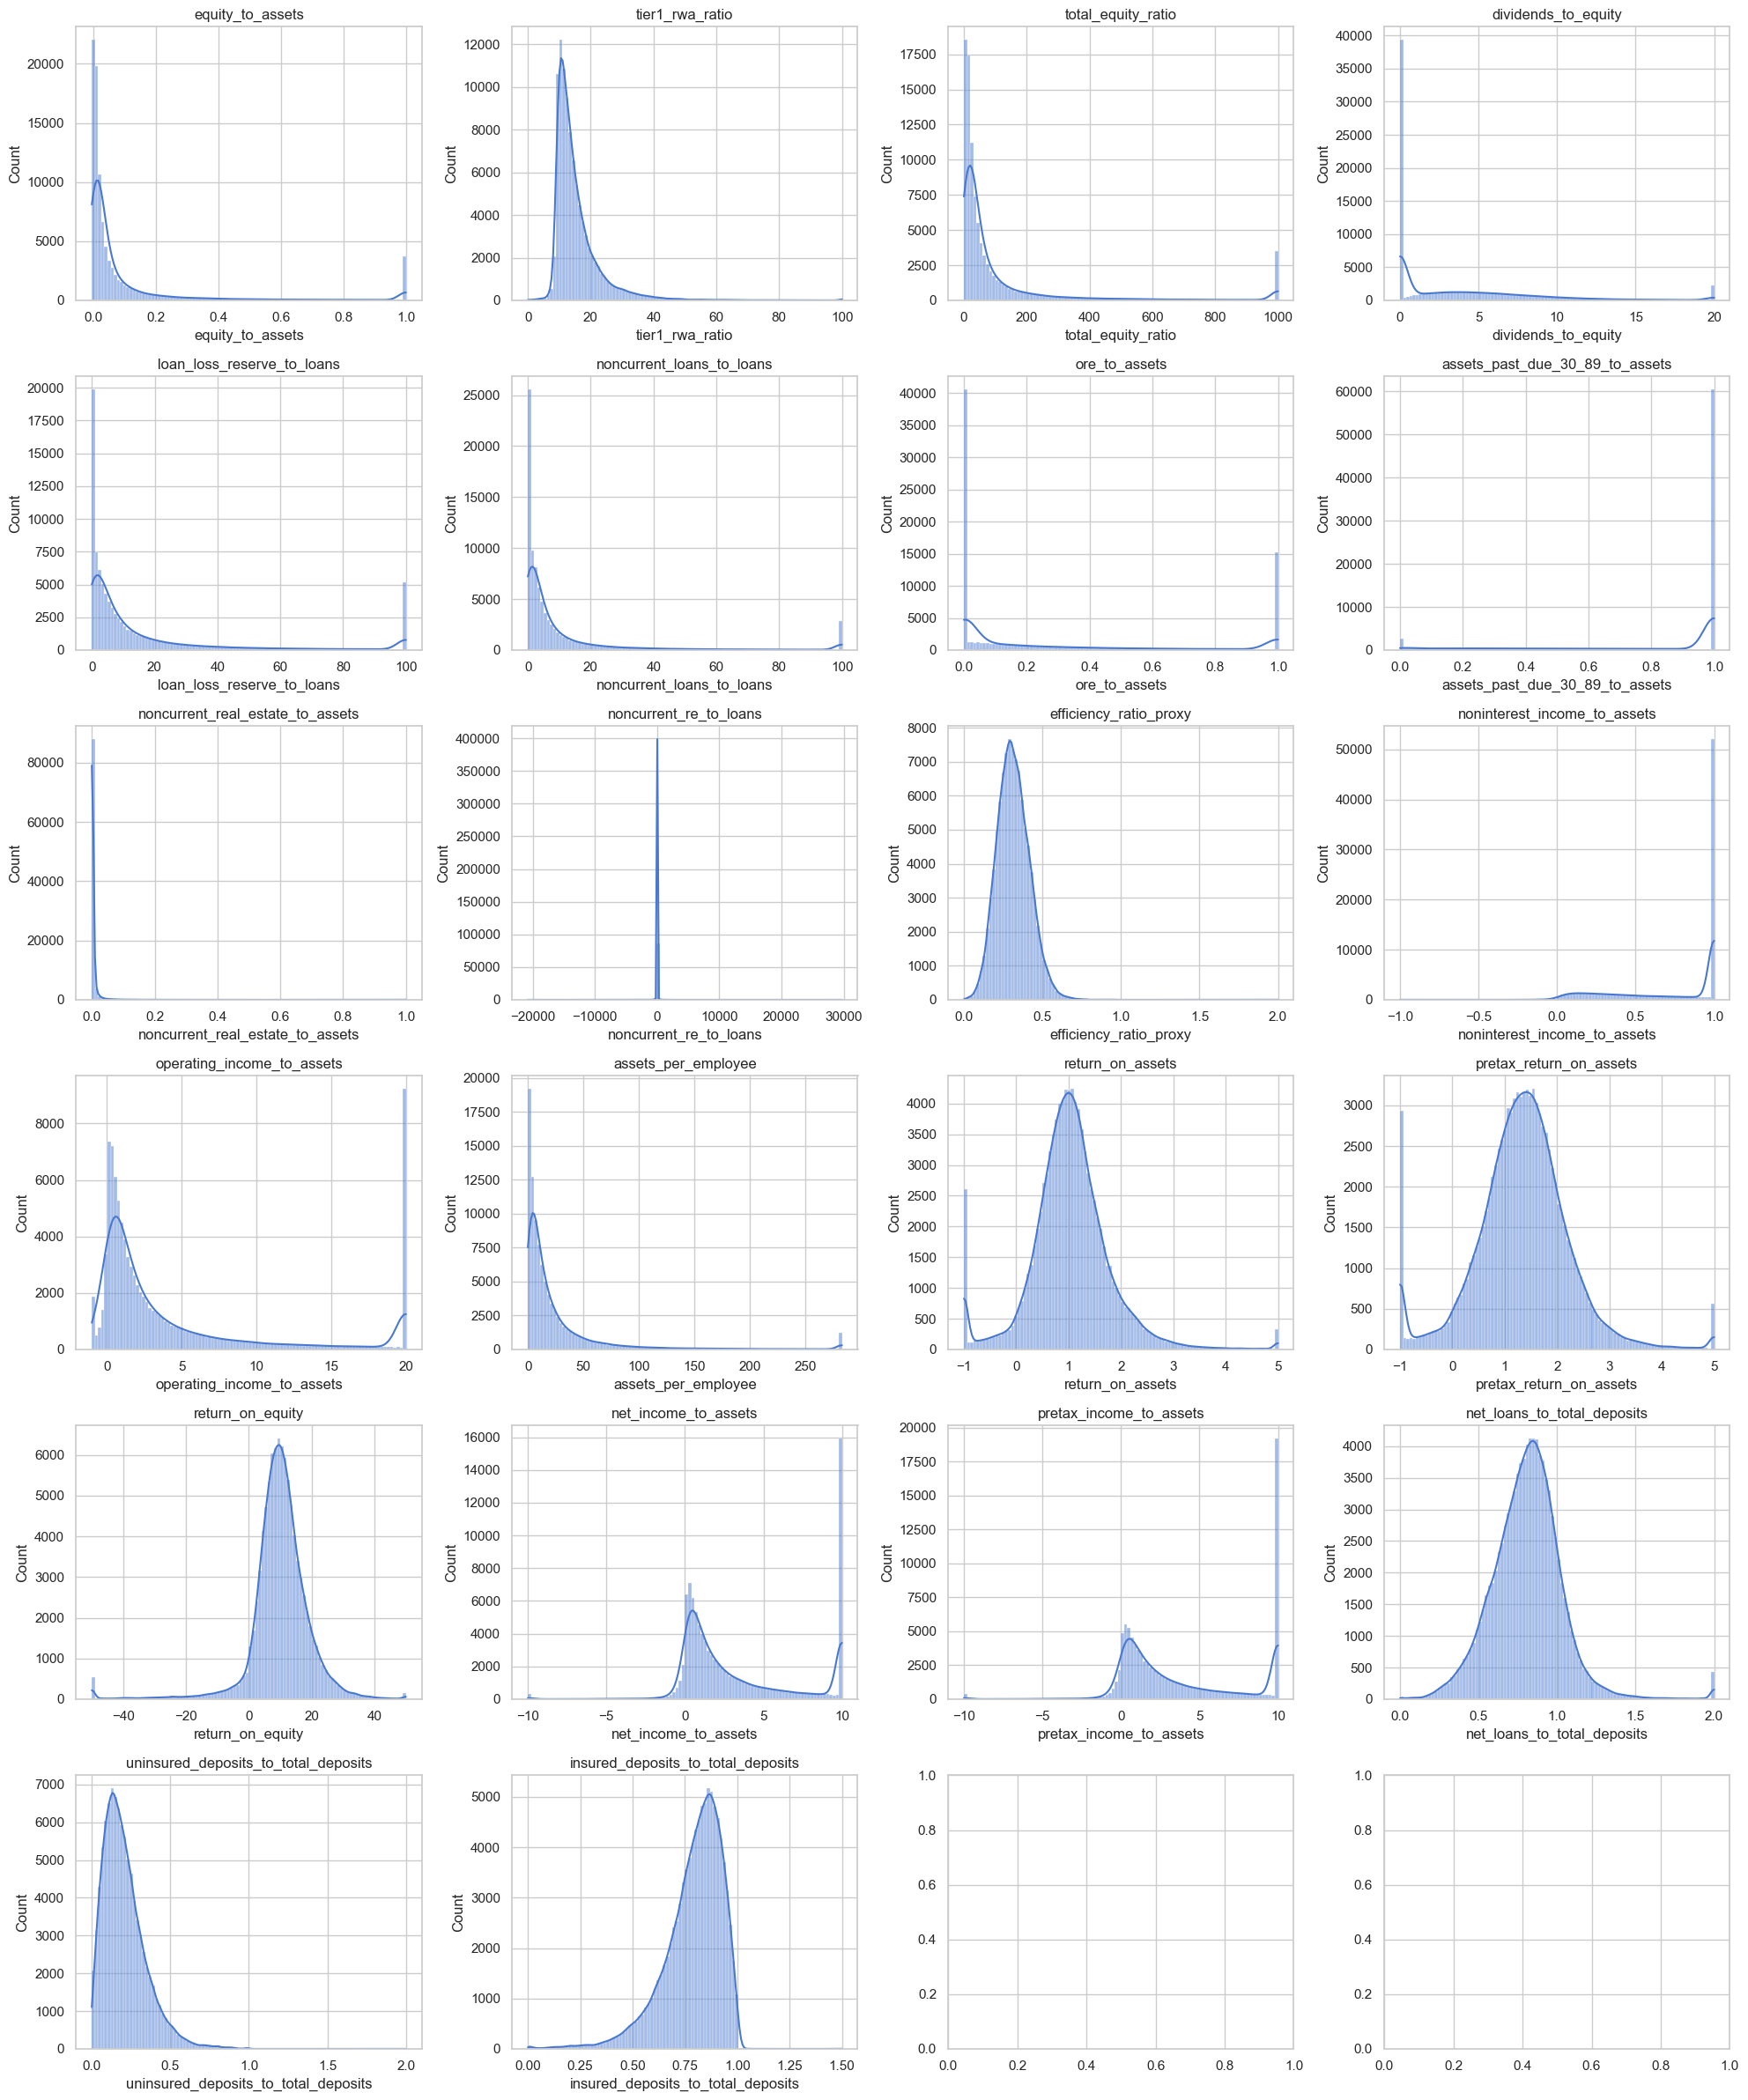

In [256]:
# Run the plot function
plot_feature_distributions(cleaned_camels_ratios_df, camels_ratios_df.columns[3:])

In [257]:
print(cleaned_camels_ratios_df.describe())

               cert  equity_to_assets  tier1_rwa_ratio  total_equity_ratio  \
count  95648.000000      95648.000000     95648.000000        95648.000000   
mean   19398.035097          0.106751        15.473811          113.417799   
std    14487.642473          0.225753         7.961675          219.827727   
min        9.000000         -0.004659         0.000000            0.000000   
25%     8804.000000          0.006060        10.823234           12.639936   
50%    16590.000000          0.020432        13.166797           30.717906   
75%    28565.000000          0.074637        17.273223           88.628413   
max    91363.000000          1.000000       100.000000         1000.000000   

       dividends_to_equity  loan_loss_reserve_to_loans  \
count         95648.000000                89050.000000   
mean              3.850156                   16.823095   
std               4.834566                   26.802274   
min               0.000000                    0.000000   
25%    

In [258]:
def parse_quarter_to_date(quarter_str:str) -> pd.Timestamp:
    year,qtr = quarter_str.split("_")
    quarter_month_map = {"Q1": "01", "Q2": "04", "Q3": "07", "Q4": "10"}
    month = quarter_month_map[qtr]
    return pd.to_datetime(f"{year}-{month}-01")

In [259]:
cleaned_camels_ratios_df["date"] = cleaned_camels_ratios_df["quarter"].apply(parse_quarter_to_date)

In [260]:
def engineer_lag_features_optimized(df: pd.DataFrame, features: list, max_lag: int = 8,
                                    bank_id_col: str = "cert") -> pd.DataFrame:
    """
    Add lag features for specified CAMELS variables.
    
    """
    df = df.copy()
    
    
    df = df.sort_values(by=[bank_id_col, "date"])

    lag_dfs = [df]

    # Generate lag features for each specified variable
    for lag in range(1, max_lag + 1):
        lagged = (
            df.groupby(bank_id_col)[features]
              .shift(lag)
              .add_suffix(f"_lag{lag}")
        )
        lag_dfs.append(lagged)

    # Concatenate all in one go for performance
    df_with_lags = pd.concat(lag_dfs, axis=1)

    return df_with_lags

In [261]:
# cleaned_camels_ratios_df.columns[3:-1]

In [262]:
engineered_df = engineer_lag_features_optimized(cleaned_camels_ratios_df,features = camels_ratios_df.columns[3:-1])

In [263]:
engineered_df = engineered_df[engineered_df["quarter"] == '2006_Q4']

In [264]:
len(engineered_df)

6553

In [265]:
with pd.option_context('display.max_rows', None):
    print(engineered_df.isnull().sum())

cert                                            0
bank_name                                       0
quarter                                         0
equity_to_assets                                0
tier1_rwa_ratio                                 0
total_equity_ratio                              0
dividends_to_equity                             0
loan_loss_reserve_to_loans                    310
noncurrent_loans_to_loans                     310
ore_to_assets                                   0
assets_past_due_30_89_to_assets                 0
noncurrent_real_estate_to_assets                0
noncurrent_re_to_loans                        310
efficiency_ratio_proxy                          1
noninterest_income_to_assets                    0
operating_income_to_assets                      0
assets_per_employee                             1
return_on_assets                                0
pretax_return_on_assets                         0
return_on_equity                                0


In [266]:
# def impute_selected_with_mean(df, columns):
#     df = df.copy()
#     for col in columns:
#         mean_value = df[col].mean()
#         df[col] = df[col].fillna(mean_value)
#     return df

# # Columns you want to impute with mean
# cols_to_impute_with_mean = ["efficiency_ratio_proxy","return_on_assets", "return_on_equity",]

# # Apply the function
# engineered_df = impute_selected_with_mean(engineered_df, cols_to_impute_with_mean)

In [267]:
def impute_selected_with_mean(df, columns):
    df = df.copy()
    for col in columns:
        mean_value = df[col].median()
        df[col] = df[col].fillna(mean_value)
    return df

cols_to_impute_with_median = engineered_df.columns[3:]

# Apply the functio
engineered_df = impute_selected_with_mean(engineered_df, cols_to_impute_with_median)

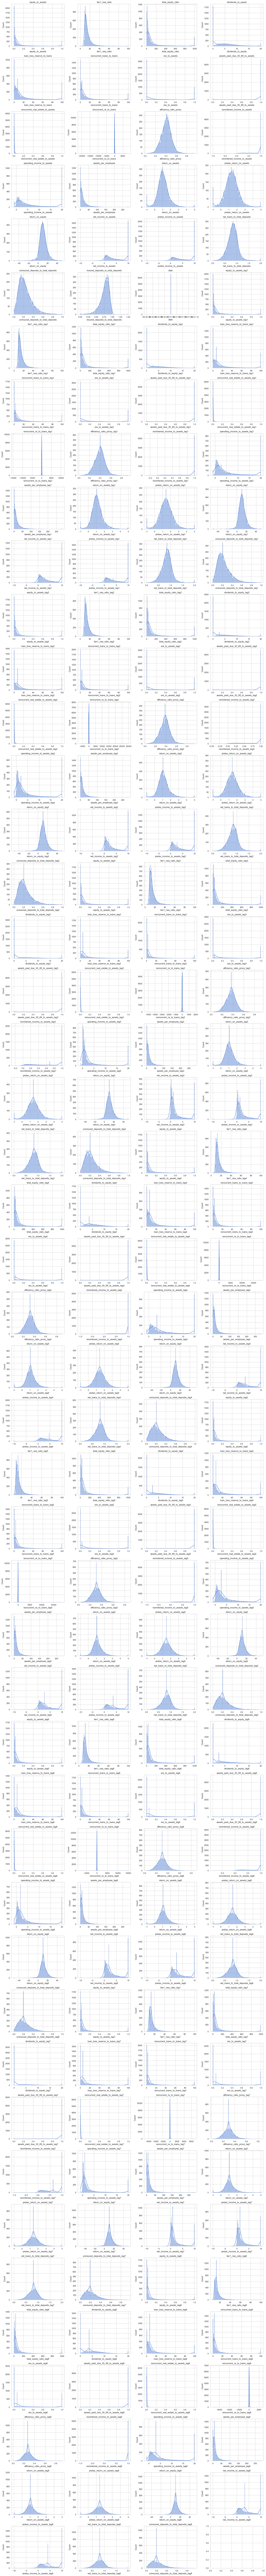

In [268]:
# Run the plot function
plot_feature_distributions(engineered_df, engineered_df.columns[3:])

In [271]:
engineered_df.columns

Index(['cert', 'bank_name', 'quarter', 'equity_to_assets', 'tier1_rwa_ratio',
       'total_equity_ratio', 'dividends_to_equity',
       'loan_loss_reserve_to_loans', 'noncurrent_loans_to_loans',
       'ore_to_assets',
       ...
       'noninterest_income_to_assets_lag8', 'operating_income_to_assets_lag8',
       'assets_per_employee_lag8', 'return_on_assets_lag8',
       'pretax_return_on_assets_lag8', 'return_on_equity_lag8',
       'net_income_to_assets_lag8', 'pretax_income_to_assets_lag8',
       'net_loans_to_total_deposits_lag8',
       'uninsured_deposits_to_total_deposits_lag8'],
      dtype='object', length=194)

In [276]:
merged_df = engineered_df.merge(label_df, on = "cert", how = "left")
merged_df["label"] = merged_df["label"].fillna(0).astype(int) 

In [280]:
X = merged_df.drop(columns=['cert', 'bank_name', 'quarter', 'label'], errors='ignore')
y = merged_df['label']

In [300]:
print(merged_df)

       cert                            bank_name  quarter  equity_to_assets  \
0         9                  UNION TRUST COMPANY  2006_Q4          0.005653   
1        14  STATE STREET BANK AND TRUST COMPANY  2006_Q4          0.001768   
2        35                           AUBURNBANK  2006_Q4          0.111326   
3        39            ROBERTSON BANKING COMPANY  2006_Q4          0.018809   
4        41                   PHENIX-GIRARD BANK  2006_Q4          0.080263   
...     ...                                  ...      ...               ...   
6548  90528                         MONTROSEBANK  2006_Q4          0.015214   
6549  90579                        HERITAGE BANK  2006_Q4          0.001928   
6550  90582                     CASTLE ROCK BANK  2006_Q4          0.020517   
6551  91005                          5 STAR BANK  2006_Q4          1.000000   
6552  91280                  BANK OF LITTLE ROCK  2006_Q4          0.006914   

      tier1_rwa_ratio  total_equity_ratio  dividend

In [291]:
X = merged_df.drop(columns=['cert', 'bank_name', 'quarter', 'date', 'label'], errors='ignore')
y = merged_df['label']

In [302]:
len(merged_df)
len(merged_df[merged_df['label']== 1])

261

In [292]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [293]:
scaler = StandardScaler()
# Re-standardize for Logistic Regression
X_train_scaled = scaler.fit_transform(X_train.fillna(0))
X_test_scaled = scaler.transform(X_test.fillna(0))

In [ ]:
# Ensure target is integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Define models
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(
    n_estimators=100,
    eval_metric='logloss',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42
)

# Train models
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Collect results
results_cleaned = {
    'Logistic Regression': {
        'ROC AUC': roc_auc_score(y_test, lr_probs),
        'Confusion Matrix': confusion_matrix(y_test, lr_preds),
        'Classification Report': classification_report(y_test, lr_preds, output_dict=True)
    },
    'Random Forest': {
        'ROC AUC': roc_auc_score(y_test, rf_probs),
        'Confusion Matrix': confusion_matrix(y_test, rf_preds),
        'Classification Report': classification_report(y_test, rf_preds, output_dict=True)
    },
    'XGBoost': {
        'ROC AUC': roc_auc_score(y_test, xgb_probs),
        'Confusion Matrix': confusion_matrix(y_test, xgb_preds),
        'Classification Report': classification_report(y_test, xgb_preds, output_dict=True)
    }
}

c:\Users\khali\OneDrive\Documents\GitHub\financial_crisis_failure_prediction\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:38:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\khali\OneDrive\Documents\GitHub\financial_crisis_failure_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khali\OneDrive\Documents\GitHub\financial_crisis_failure_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [296]:
results_cleaned

{'Logistic Regression': {'ROC AUC': np.float64(0.6984531182094741),
  'Confusion Matrix': array([[1565,  323],
         [  47,   31]]),
  'Classification Report': {'0': {'precision': 0.9708436724565757,
    'recall': 0.8289194915254238,
    'f1-score': 0.8942857142857142,
    'support': 1888.0},
   '1': {'precision': 0.08757062146892655,
    'recall': 0.3974358974358974,
    'f1-score': 0.14351851851851852,
    'support': 78.0},
   'accuracy': 0.8118006103763988,
   'macro avg': {'precision': 0.5292071469627511,
    'recall': 0.6131776944806606,
    'f1-score': 0.5189021164021164,
    'support': 1966.0},
   'weighted avg': {'precision': 0.9358002858965366,
    'recall': 0.8118006103763988,
    'f1-score': 0.8644994267629059,
    'support': 1966.0}}},
 'Random Forest': {'ROC AUC': np.float64(0.7463704639287266),
  'Confusion Matrix': array([[1888,    0],
         [  78,    0]]),
  'Classification Report': {'0': {'precision': 0.960325534079349,
    'recall': 1.0,
    'f1-score': 0.979761

Results are bad , lets resample out minority class by using SMOTE technique

In [311]:
from imblearn.over_sampling import SMOTE

In [313]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply on scaled features
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [314]:
import numpy as np
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(4404), np.int64(1): np.int64(4404)}


In [315]:
# Predict probabilities
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Predict class labels
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)
xgb_preds = xgb_model.predict(X_test_scaled)

In [316]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

results_after_smote = {
    'Logistic Regression (SMOTE)': {
        'ROC AUC': roc_auc_score(y_test, lr_probs),
        'Confusion Matrix': confusion_matrix(y_test, lr_preds),
        'Classification Report': classification_report(y_test, lr_preds, output_dict=True)
    },
    'Random Forest (SMOTE)': {
        'ROC AUC': roc_auc_score(y_test, rf_probs),
        'Confusion Matrix': confusion_matrix(y_test, rf_preds),
        'Classification Report': classification_report(y_test, rf_preds, output_dict=True)
    },
    'XGBoost (SMOTE)': {
        'ROC AUC': roc_auc_score(y_test, xgb_probs),
        'Confusion Matrix': confusion_matrix(y_test, xgb_preds),
        'Classification Report': classification_report(y_test, xgb_preds, output_dict=True)
    }
}

c:\Users\khali\OneDrive\Documents\GitHub\financial_crisis_failure_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khali\OneDrive\Documents\GitHub\financial_crisis_failure_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\khali\OneDrive\Documents\GitHub\financial_crisis_failure_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

In [317]:
for model_name, metrics in results_after_smote.items():
    print(f"\n=== {model_name} ===")
    print(f"ROC AUC: {metrics['ROC AUC']:.3f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(classification_report(y_test, 
                                lr_preds if "Logistic" in model_name else 
                                rf_preds if "Random" in model_name else 
                                xgb_preds,
                                zero_division=0))


=== Logistic Regression (SMOTE) ===
ROC AUC: 0.698
Confusion Matrix:
[[1565  323]
 [  47   31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1888
           1       0.09      0.40      0.14        78

    accuracy                           0.81      1966
   macro avg       0.53      0.61      0.52      1966
weighted avg       0.94      0.81      0.86      1966


=== Random Forest (SMOTE) ===
ROC AUC: 0.746
Confusion Matrix:
[[1888    0]
 [  78    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1888
           1       0.00      0.00      0.00        78

    accuracy                           0.96      1966
   macro avg       0.48      0.50      0.49      1966
weighted avg       0.92      0.96      0.94      1966


=== XGBoost (SMOTE) ===
ROC AUC: 0.766
Confusion Matrix:
[[1877   11]
 [  74    4]]
Classification Report:
    

In [318]:
from sklearn.metrics import precision_recall_curve

probs = xgb_model.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Choose a threshold with higher recall (e.g., 0.2)
custom_preds = (probs >= 0.2).astype(int)

In [319]:
print(confusion_matrix(y_test, custom_preds))
print(classification_report(y_test, custom_preds))

[[1847   41]
 [  69    9]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1888
           1       0.18      0.12      0.14        78

    accuracy                           0.94      1966
   macro avg       0.57      0.55      0.56      1966
weighted avg       0.93      0.94      0.94      1966



In [320]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Feature selector based on feature importance
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

# Fit on the resampled training data
selector.fit(X_train_resampled, y_train_resampled)

# Transform train and test data
X_train_sel = selector.transform(X_train_resampled)
X_test_sel = selector.transform(X_test_scaled)

In [321]:
print("Selected features:", X_train_sel.shape[1], "out of", X_train_resampled.shape[1])

Selected features: 95 out of 190


In [322]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Define base models
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
xgb = XGBClassifier(n_estimators=100, eval_metric='logloss', scale_pos_weight=(y_train_resampled == 0).sum() / (y_train_resampled == 1).sum(), random_state=42)

# Combine in a soft voting ensemble
voting_model = VotingClassifier(
    estimators=[('lr', lr), ('xgb', xgb)],
    voting='soft'
)

# Fit ensemble on reduced training set
voting_model.fit(X_train_sel, y_train_resampled)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            fea...,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [323]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Predict
voting_probs = voting_model.predict_proba(X_test_sel)[:, 1]
voting_preds = voting_model.predict(X_test_sel)

# Evaluate
print("=== Voting Ensemble ===")
print(f"ROC AUC: {roc_auc_score(y_test, voting_probs):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, voting_preds))
print("Classification Report:")
print(classification_report(y_test, voting_preds, zero_division=0))


=== Voting Ensemble ===
ROC AUC: 0.754
Confusion Matrix:
[[1803   85]
 [  64   14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1888
           1       0.14      0.18      0.16        78

    accuracy                           0.92      1966
   macro avg       0.55      0.57      0.56      1966
weighted avg       0.93      0.92      0.93      1966

